# Project: TMDb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
<li><a href="#References">References</a></li>
    
</ul>


<a id='intro'></a>
## Introduction

> TMDb Movie Data
I am going to analyse this movie data from Kaggle and here are
some of its attributes and description

     *budget - The budget in which the movie was made.
     
     *cast - The name of lead and supporting actors.
     
     *director - The name of the movie director
     
     **genre - The genre of the movie, Action, Comedy ,Thriller etc.
     
     *homepage - A link to the homepage of the movie.
     
     *imdb_id - This is the movie_id.
     
     *keywords - The keywords or tags related to the movie.
     
     *original_title - The title of the movie before translation or adaptation.
     
     *overview - A brief description of the movie.
     
     *popularity - A numeric quantity specifying the movie popularity.
     
     *production_companies - The production house of the movie.
     
     *release_date - The date on which it was released.
     
     *release_year - The year on which it was released.
     
     *revenue - The worldwide revenue generated by the movie.
     
     *runtime - The running time of the movie in minutes.
     
     *tagline - Movie's tagline.
     
     *original_title - Title of the movie.
     
     *vote_average - average ratings the movie recieved.
     
     *vote_count - the count of votes recieved.
     
  
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
pwd

'C:\\Users\\user\\Documents'

In [3]:
df = pd.read_csv('tmdb-movies.csv')

In [4]:
df.head(2)

,Unnamed: 0,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08


In [5]:
df.tail(2)

,Unnamed: 0,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/02/1966,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.2792,0.0


In [6]:
df.shape

(10866, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df.isnull().sum()

Unnamed: 0                 0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
df.describe()

,Unnamed: 0,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
#checking if the release_year is similar to all movies or not to acertain that it is significant in my analysis

df['release_year'].nunique()

56

In [11]:
df.duplicated().sum()# checking for duplicated rows

1

### Data Cleaning (Replace this with more specific notes!)

Cleaning Data : Casting Datatypes and Handling Missing values
Data cleaning means fixing bad data in your data set.

Bad data could be:

Empty cells

Data in wrong format

Wrong data

Duplicates

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
sum(df.duplicated())

0

In [14]:
df.drop(['Unnamed: 0', 'homepage', 'imdb_id','tagline','keywords','budget_adj','revenue_adj'], axis = 1, inplace = True);

In [15]:
#checking if they have been dropped
print(list(df.columns.values))

['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year']


In [16]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

I want to drop all the movies  where all the following details are missing:

genres, director, cast and overview. 
I can easily replace the missing values for the attributes director, cast and overview with their modal class but that may open room for biasness hence I will go ahead and drop the rows as well.

In [17]:
cols=['genres','director','cast','overview']
df.dropna(axis='index', how='any', subset=cols, inplace=True)

In [18]:
df.isnull().sum()

popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
overview                  0
runtime                   0
genres                    0
production_companies    957
release_date              0
vote_count                0
vote_average              0
release_year              0
dtype: int64

the action above has gotten rid of the rows with the attribute genres, cast, director and overview missing.
I consider the attribute production_ companies important in my analysis so even though it has many missing values I will not opt for dropping the whole column. so in the same manner above I will also drop all rows with the production company missing.

In [19]:
cols=['production_companies']
df.dropna(axis='index', how='any', subset=cols, inplace=True)

In [20]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [21]:
df.tail(1)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
10865,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966


There are some movies with the value (0) for the attributes budget and revenue which is an indicator that those values are missing and for that reason i will drop the movies.If the last value didnt reflect this i had seen this in the minimum value

In [22]:
df = df[df.budget != 0]
df = df[df.revenue != 0]

In [23]:
df.shape

(3805, 14)

after all these we have the number of rows as 3805 and the number of columns as 14

In [24]:
#fixing release_date so it reads the read release year,month then day

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [25]:

#from datetime import datetime
#dfm.release_date=pd.to_datetime(dfm['release_date'])
df.head(1)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


I would like to rename the column 'original_title' as 'titles' and then make the new column 'movies' be the first column

In [26]:
df = df.rename(columns = {'original_title':'title'})

In [27]:
#checking for the changes
print(list(df.columns.values))

['popularity', 'budget', 'revenue', 'title', 'cast', 'director', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year']


In [28]:
df = df.reindex(['title', 'popularity', 'budget', 'revenue', 'cast', 'director', 'overview', 'runtime', 'genres', 
                 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year' ], axis = 1)

In [29]:
df.head(1)

,title,popularity,budget,revenue,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,Jurassic World,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


Before I continue to clean my data i want to save all the changes so I will not have to do the process all over again

In [30]:
df.to_csv('movie_edited.csv', index=False)

In [31]:
df.head(1)

,title,popularity,budget,revenue,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,Jurassic World,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


Now that there are no missing values and all my changes have been saved ill go ahead and deal with all columns which have multiple entries seperated by "|". For the cast I want to discard all the other actors and remain only with the lead actors which I will know by the first entry in every column I will also do the same for the genres column

In [32]:
df_cast=df['cast'].str.split('|', expand=True)

In [33]:
df_cast.columns=['star_cast','one','two','three','four']

In [34]:
df_cast.head(1)

,star_cast,one,two,three,four
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson


In [35]:
#dropping the columns i dont want
df_cast.drop(['one','two','three','four'], axis=1, inplace=True)

In [36]:
df_cast.head()

,star_cast
0,Chris Pratt
1,Tom Hardy
2,Shailene Woodley
3,Harrison Ford
4,Vin Diesel


Next is to split the genres column and then drop all the other columns except the first

In [37]:
df_genre=df['genres'].str.split('|', expand=True)

In [38]:
df_genre.columns=['genre','one','two','three','four']

In [39]:
df_genre.drop(['one','two','three','four'], axis=1, inplace=True);


In [40]:
df_genre.head()

,genre
0,Action
1,Action
2,Adventure
3,Action
4,Action


In [41]:
df_new=pd.concat([df_cast, df_genre], axis=1, join='inner')

In [42]:
df_new.shape

(3805, 2)

In [43]:
df_final=pd.concat([df, df_new], axis=1, join='inner')

In [44]:
df_final.head(2)

,title,popularity,budget,revenue,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,star_cast,genre
0,Jurassic World,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Chris Pratt,Action
1,Mad Max: Fury Road,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Tom Hardy,Action


In [45]:
df_final.drop(['cast','genres'], axis = 1, inplace = True);

In [46]:
df_final.head()

,title,popularity,budget,revenue,director,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,star_cast,genre
0,Jurassic World,32.985763,150000000,1513528810,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,Chris Pratt,Action
1,Mad Max: Fury Road,28.419936,150000000,378436354,George Miller,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,Tom Hardy,Action
2,Insurgent,13.112507,110000000,295238201,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,Shailene Woodley,Adventure
3,Star Wars: The Force Awakens,11.173104,200000000,2068178225,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,Harrison Ford,Action
4,Furious 7,9.335014,190000000,1506249360,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,Vin Diesel,Action


In [47]:
print(list(df_final.columns.values))

['title', 'popularity', 'budget', 'revenue', 'director', 'overview', 'runtime', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'star_cast', 'genre']


In [48]:
df=df_final.reindex(['title', 'genre','star_cast','director', 'popularity','production_companies', 'budget', 'revenue',  'overview', 'runtime',
                  'release_date', 'vote_count', 'vote_average', 'release_year' ] , axis=1)

In [49]:
df.to_csv('movie_clean.csv', index=False)

In [50]:
df

,title,genre,star_cast,director,popularity,production_companies,budget,revenue,overview,runtime,release_date,vote_count,vote_average,release_year
0,Jurassic World,Action,Chris Pratt,Colin Trevorrow,32.985763,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,Twenty-two years after the events of Jurassic ...,124,2015-06-09,5562,6.5,2015
1,Mad Max: Fury Road,Action,Tom Hardy,George Miller,28.419936,Village Roadshow Pictures|Kennedy Miller Produ...,150000000,378436354,An apocalyptic story set in the furthest reach...,120,2015-05-13,6185,7.1,2015
2,Insurgent,Adventure,Shailene Woodley,Robert Schwentke,13.112507,Summit Entertainment|Mandeville Films|Red Wago...,110000000,295238201,Beatrice Prior must confront her inner demons ...,119,2015-03-18,2480,6.3,2015
3,Star Wars: The Force Awakens,Action,Harrison Ford,J.J. Abrams,11.173104,Lucasfilm|Truenorth Productions|Bad Robot,200000000,2068178225,Thirty years after defeating the Galactic Empi...,136,2015-12-15,5292,7.5,2015
4,Furious 7,Action,Vin Diesel,James Wan,9.335014,Universal Pictures|Original Film|Media Rights ...,190000000,1506249360,Deckard Shaw seeks revenge against Dominic Tor...,137,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,Drama,Elizabeth Taylor,Mike Nichols,0.670274,Chenault Productions,7500000,33736689,Mike Nicholsâ€™ film from Edward Albee's play ...,131,2066-06-21,74,7.5,1966
10828,Torn Curtain,Mystery,Paul Newman,Alfred Hitchcock,0.402730,Universal Pictures,3000000,13000000,An American scientist publicly defects to East...,128,2066-07-13,46,6.3,1966
10829,El Dorado,Action,John Wayne,Howard Hawks,0.395668,Paramount Pictures|Laurel Productions,4653000,6000000,"Cole Thornton, a gunfighter for hire, joins fo...",120,2066-12-17,36,6.9,1966
10835,The Sand Pebbles,Action,Steve McQueen,Robert Wise,0.299911,Twentieth Century Fox Film Corporation|Solar P...,12000000,20000000,Engineer Jake Holman arrives aboard the gunboa...,182,2066-12-20,28,7.0,1966


In [51]:
df.dtypes

title                           object
genre                           object
star_cast                       object
director                        object
popularity                     float64
production_companies            object
budget                           int64
revenue                          int64
overview                        object
runtime                          int64
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. 


### Research Question  1 (which star_cast has more movies? )

In [52]:
df_a=pd.read_csv('movie_clean.csv')

In [53]:
df_a.star_cast.value_counts().head(20)

Nicolas Cage             37
Bruce Willis             32
Johnny Depp              30
Sylvester Stallone       29
Robert De Niro           28
Tom Hanks                28
Denzel Washington        28
Tom Cruise               27
Arnold Schwarzenegger    26
Adam Sandler             24
Eddie Murphy             23
Jim Carrey               23
Harrison Ford            23
Matt Damon               22
Keanu Reeves             22
John Travolta            21
Kevin Costner            20
Ben Stiller              20
Michael Douglas          19
Robin Williams           19
Name: star_cast, dtype: int64

Nicolas Cage has acted in many movies as compared to the other star cast

In [54]:
df_a.query('star_cast == "Nicolas Cage" ').genre.value_counts()

Action       9
Drama        7
Comedy       6
Thriller     4
Crime        4
Adventure    3
Fantasy      2
Animation    1
Mystery      1
Name: genre, dtype: int64

The top three movie genres that Nicolas Cage has starred in are action, drama and comedy

 ### Research Question 2 (What are the movies with highest and lowest revenue, highest and lowest budget?)

Creating a function to return all information about the movie with lowest and highest budget and revenue

<AxesSubplot:ylabel='title'>

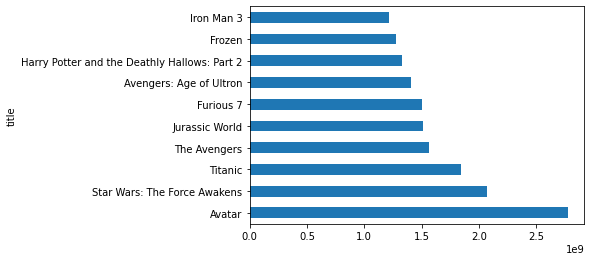

In [55]:
 df_a.groupby('title')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

Avatar made the most revenue out of all the movies

I would like to know all the information regarding movies with lowest and highest revenue and budget

A function to find information on the said movies is as below

In [56]:
 def find(column):
    #for highest revenue
    high= df_a[column].idxmax()
    high_details=pd.DataFrame(df_a.loc[high])
    
    #for lowest revenue
    low= df_a[column].idxmin()
    low_details=pd.DataFrame(df_a.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
find('revenue')

,344,1711
title,Avatar,Shattered Glass
genre,Action,Drama
star_cast,Sam Worthington,Hayden Christensen
director,James Cameron,Billy Ray
popularity,9.432768,0.462609
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
budget,237000000,6000000
revenue,2781505847,2
overview,"In the 22nd century, a paraplegic Marine is di...",Fact-based 2003 drama about the young journali...
runtime,162,94


Avatar is the movie with the highest revenue and its in row 344 while Shattered Glass in row 1711 had the lowest revenue.

In [57]:
find('budget')

,678,805
title,The Warrior's Way,Lost & Found
genre,Adventure,Comedy
star_cast,Kate Bosworth,David Spade
director,Sngmoo Lee,Jeff Pollack
popularity,0.25054,0.090186
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment
budget,425000000,1
revenue,11087569,100
overview,An Asian assassin (Dong-gun Jang) is forced to...,A comedy about finding your true love at any p...
runtime,100,95


The Warrior's Way	 is the movie with the highest budget and its in row 678 while Lost & Found in row 805 had the lowest budget.

The function can be used to find the most popular movie over the years 

In [58]:
find('popularity')

,0,2014
title,Jurassic World,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´
genre,Action,War
star_cast,Chris Pratt,Thomas Kretschmann
director,Colin Trevorrow,Fyodor Bondarchuk
popularity,32.985763,0.010335
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Art Pictures Studio
budget,150000000,30000000
revenue,1513528810,68129518
overview,Twenty-two years after the events of Jurassic ...,"Drama set in 1942, during one of the most impo..."
runtime,124,131


A plot of movies with their popularity also shows that Jurassic World is the most popular movie though it doeesn"t show the least popular because I only chose 10 movies in order of their popularity.

<AxesSubplot:ylabel='title'>

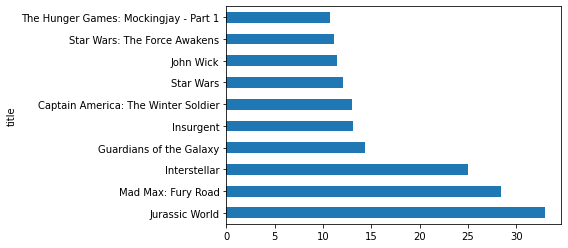

In [59]:
df_a.groupby('title')['popularity'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

### Research Question 3 (What kinds of properties are associated with movies that have high revenues?)

In [60]:
df.revenue.mean()

108973391.99159001

In [61]:
# select movies with revenue less than the mean
low_revenue = df.query('revenue < 108973391.99159001')

# select movies with revenue more than the mean
high_revenue = df.query('revenue > 108973391.99159001')

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_revenue['popularity'].count() + high_revenue['popularity'].count() 

True

In [62]:
# get mean quality rating for the low_revenue and high_revenue groups
low_revenue.popularity.mean(), high_revenue.popularity.mean()

(0.8005907675276743, 2.2016423305936055)

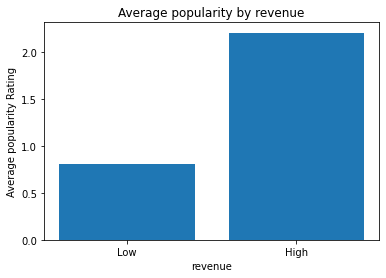

In [63]:

mean_popularity_low = low_revenue['popularity'].mean()
mean_popularity_high = high_revenue['popularity'].mean()
locations = [1, 2]
heights = [mean_popularity_low, mean_popularity_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average popularity by revenue')
plt.xlabel('revenue')
plt.ylabel('Average popularity Rating');

From the graph I am able to see that movies with high revenue have higher popularity

<AxesSubplot:xlabel='genre'>

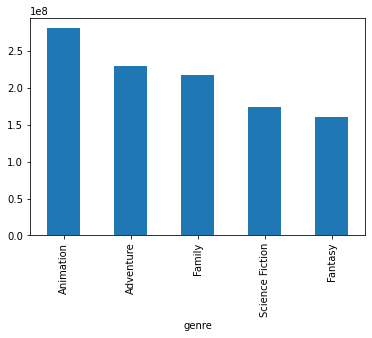

In [64]:
df_a.groupby('genre').revenue.mean().sort_values(ascending=False).head(5).plot(kind='bar')

Movies of the genre 'Animation'makes higher revenue as compared to those of the other genres

### Research Question 4 (Which genres are most popular from year to year?)


In [65]:
df_a.describe().release_year

count    3805.000000
mean     2001.229172
std        11.329616
min      1960.000000
25%      1995.000000
50%      2004.000000
75%      2010.000000
max      2015.000000
Name: release_year, dtype: float64

In [66]:
year_set = set()
genre_set = set()
genres_and_year = df_a[["genre", "release_year"]]



In [67]:
production_year = genres_and_year["release_year"]
production_year = production_year.drop_duplicates()
for year in production_year:
    if year not in year_set:
        year_set.add(year)
        
print(year_set)

{1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}


In [68]:
for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_and_year['genre'].values
    for genre in genres_in_year:
        if genre not in genre_set:
                genre_set.add(genre)

print(genre_set)

{'Science Fiction', 'Crime', 'Thriller', 'Action', 'War', 'Drama', 'Fantasy', 'TV Movie', 'Romance', 'Horror', 'Animation', 'Music', 'Adventure', 'Western', 'Mystery', 'Family', 'Documentary', 'History', 'Comedy'}


In [69]:
genre_count_per_year_df = pd.DataFrame(index = year_set, columns=genre_set)
genre_count_per_year_df[:] = 0  

In [70]:
    aux_df = pd.DataFrame(genre_dict, index = [year])
    genre_count_per_year_df.loc[year, aux_df.columns] = genre_count_per_year_df.loc[year, aux_df.columns] + aux_df.loc[year]

In [71]:
#most_popular_genre_by_year = pd.DataFrame(([genre_count_per_year_df.idxmax(axis=1 ).values,
                                           # genre_count_per_year_df.apply( max, axis=1 ).values],
                                          # columns=genre_count_per_year_df.index,
                                          #index=["genre", 'counts'])
                                           


In [72]:
#most_popular_genre_by_year

unfortunately I was unable to answer this question , I tried to google it and the above code was the one Im getting. 
I havent given up on it just that the deadline is fast approaching

### Research Question 5 (Which runtime levels receives the highest average revunue?)

In [73]:
df_a.describe().runtime

count    3805.000000
mean      109.351117
std        19.845678
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [74]:
bin_edges = [15.00, 96.00, 106.00, 119.00, 338.00]

In [75]:
#naming each runtime level category
bin_names = ['short', 'medium', 'mod_long', 'long']

In [76]:
# Creates runtime_levels column
df_a['runtime_levels'] = pd.cut(df_a['runtime'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_a.head()

,title,genre,star_cast,director,popularity,production_companies,budget,revenue,overview,runtime,release_date,vote_count,vote_average,release_year,runtime_levels
0,Jurassic World,Action,Chris Pratt,Colin Trevorrow,32.985763,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810,Twenty-two years after the events of Jurassic ...,124,2015-06-09,5562,6.5,2015,long
1,Mad Max: Fury Road,Action,Tom Hardy,George Miller,28.419936,Village Roadshow Pictures|Kennedy Miller Produ...,150000000,378436354,An apocalyptic story set in the furthest reach...,120,2015-05-13,6185,7.1,2015,long
2,Insurgent,Adventure,Shailene Woodley,Robert Schwentke,13.112507,Summit Entertainment|Mandeville Films|Red Wago...,110000000,295238201,Beatrice Prior must confront her inner demons ...,119,2015-03-18,2480,6.3,2015,mod_long
3,Star Wars: The Force Awakens,Action,Harrison Ford,J.J. Abrams,11.173104,Lucasfilm|Truenorth Productions|Bad Robot,200000000,2068178225,Thirty years after defeating the Galactic Empi...,136,2015-12-15,5292,7.5,2015,long
4,Furious 7,Action,Vin Diesel,James Wan,9.335014,Universal Pictures|Original Film|Media Rights ...,190000000,1506249360,Deckard Shaw seeks revenge against Dominic Tor...,137,2015-04-01,2947,7.3,2015,long


In [77]:
# Save changes for the next section
df_a.to_csv('movies_edited.csv', index=False)

In [78]:
# Find the mean popularity of each runtime level with groupby
mean_popularity= df_a.groupby('runtime_levels').mean().popularity.sort_values(ascending= False)
mean_popularity

runtime_levels
long        1.735443
mod_long    1.184276
medium      1.005156
short       0.921072
Name: popularity, dtype: float64

long movies have the highest mean popularity

In [79]:
mean_runtime= df_a.groupby('runtime_levels').mean().revenue.sort_values(ascending= False)
mean_runtime                                                                  

runtime_levels
long        1.835737e+08
mod_long    9.761735e+07
medium      7.903328e+07
short       7.856229e+07
Name: revenue, dtype: float64

long movies have the highest mean revenue

The two outputs above seem to show that popularity and revenue goes hand in hand with runtime_levels. Long movies have highest mean_popularity and mean_revenue while short movies have the lowest mean_popularity and mean_revenue.


### Research Question 6 (Which year had the highest revenue?)
what genre stood out in the year,talk about 2014 being the year with most movies 

In [80]:
df_a.groupby('release_year').revenue.mean().sort_values(ascending=False).head(10)

release_year
2015    1.637683e+08
2012    1.538284e+08
2014    1.458786e+08
2013    1.360306e+08
2009    1.270826e+08
2010    1.231703e+08
2003    1.219669e+08
2011    1.194247e+08
2007    1.172009e+08
2008    1.169454e+08
Name: revenue, dtype: float64

The year 2015 the movie industry got the highest amount of revenue

In [81]:
df_a.release_year.value_counts().sort_values(ascending=False).head(13)

2011    196
2013    179
2010    177
2009    170
2006    168
2014    165
2008    161
2015    160
2005    159
2007    159
2012    157
2004    142
2002    125
Name: release_year, dtype: int64

Despite 2015 being the year with the highest revenue most movies were not produced in the year. Consequently 2011 was te year most movies were produced yet it did not yield the highest revenue

<a id='conclusions'></a>
## Conclusions


Working on this dataset has been a step out of my comfort zone. Though challanging I was able to use my acquired knowledge so far to manipulate it and source any hidden information it may have. 

some of my findings were that the properties of movies with high revenue are:

           *Of the genre 'Animation'
           *Long movies 
           *Has high mean_popularity

<a id='conclusions'></a>
## Limitations

The currency was not provided for budget and revenue and given that these movies were possibly from different countries it might be the case that the currencies varied.

I chose to assume that the first entries in the "genre" and "cast" columns were the implied "genre" and "star_cast" so having discarded the other information may have opened room to biaseness.

Having dropped more than half of the rows (from 10866 to 3804) may have led to loss of information thus altering the findings in analysis.

My level in programming is entry level and thus answering some of the questions were challanging. One of the key questions "what genres are most popular from year to year?" was the most challanging to answer and unfortunately I didnt find  a way to answer it.


<a id='conclusions'></a>
## References

1.https://dasclab.uonbi.ac.ke/dstraining/python-functions.html

2.https://praxitelisk.github.io/DAND-P1-Investigate-a-Dataset/Investigate_a_Dataset.html

3.https://dasclab.uonbi.ac.ke/dstraining/data-analysis-with-python-pandas.html

4.https://medium.com/@anjana.vegaraju/exploratory-data-analysis-on-tmdb-dataset-b2c99aadf10e

5.https://commonmark.org/help/tutorial/06-lists.html

6.https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0000/modules/306f0239-bb80-45c6-bf45-37ee745a63d6/lessons/ls0524/concepts/7b29eacd-587d-4d32-9302-c89c1a590ac4
